no. of colours (1 to 34)?  3
offset (in radians) from golden angle?  0


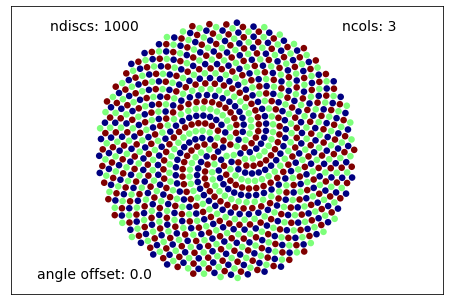

In [1]:
# chromoSpirals.py
# ----------------
# Code written by Peter Derlien, University of Sheffield, March 2013
# Draws spiralling patterns of circles using the Golden Angle.
# ----------------
# http://numerica.pt/2017/09/14/fibonacci-spiral-in-python/

# Import from the numpy and matplotlib packages.
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.collections import PatchCollection
import matplotlib.patches as mpatches

ox = 0.5
oy = 0.4  # centre of plot

ndiscs = 1000
# ndiscs = input('No. of discs (e.g. 300)? ')
# ndiscs = int(ndiscs)
ncols = input('no. of colours (1 to 34)? ')
ncols = int(ncols)

offset = 0.0
offset = input('offset (in radians) from golden angle? ')
offset = float(offset)

tau = (1+5**0.5)/2.0  # golden ratio approx = 1.618033989

# (2-tau)*2*np.pi is golden angle = c. 2.39996323 radians, or c. 137.5 degrees
inc = (2-tau)*2*np.pi + offset
theta = 0
k = 0.1  # scale factor
drad = k*(1+5**0.5)/4.0  # radius of each disc
minv = maxv = 0  # minv and maxv will be used later to display inputs chosen

# now collect in list 'patches' the locations of all the discs
patches = []
for j in range(1, ndiscs+1):
    r = k*j**0.5
    theta += inc
    x = ox + r*np.cos(theta)
    y = oy + r*np.sin(theta)
    if y > maxv:
        maxv=y
    elif y < minv:
        minv=y
    disc = mpatches.Circle((x, y), drad)
    patches.append(disc)

# start building the plot
fig = plt.figure()
ax = plt.axes([0, 0, 1, 1])

# create text to show which inputs the user has chosen
font = "sans-serif"
maxv = maxv*0.95
nd = 'ndiscs: ' + str(ndiscs)
plt.text(minv, maxv, nd, ha="center", family=font, size=14)
setting = 'angle offset: ' + str(offset)
plt.text(minv, minv, setting, ha="center", family=font, size=14)
nc = 'ncols: ' + str(ncols)
plt.text(maxv, maxv, nc, ha="left", family=font, size=14)

# build colour cycle, using a number between 0 and 100 for each colour
colcycle = []
s = 100/ncols
for j in range(ndiscs):
    colcycle.append((j % ncols)*s)

# bring together the information for locations and colours of discs
collection = PatchCollection(patches, cmap=matplotlib.cm.jet, alpha=1.0)
collection.set_array(np.array(colcycle))
ax.add_collection(collection)

ax.set_xticks([])
ax.set_yticks([])  # suppress display of axes
plt.axis('equal')
plt.show()  # display the plot we have built
